In [1]:
import pandas as pd

sleep = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

sleep.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


#### 성별(Gender) 숫자로 변환하기

In [2]:
onehot_gender = pd.get_dummies(sleep['Gender'])
sleep = pd.concat([sleep, onehot_gender], axis=1)

sleep.drop(['Gender'], axis=1, inplace=True)

In [3]:
sleep.head(3)

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,0,1
1,2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,0,1
2,3,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,0,1


#### 사용하지 않을 Person ID, Occupation(직업) 열 제거

In [4]:
sleep.drop(['Person ID','Occupation'], axis=1, inplace=True)       

##### BMI Category 수치를 숫자로 변경하기 

In [5]:
sleep['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [6]:
onehot_bmi = pd.get_dummies(sleep['BMI Category'])
sleep = pd.concat([sleep, onehot_bmi], axis=1)

sleep.drop(['BMI Category'], axis=1, inplace=True)

In [ ]:
## 방법 2) 레이블 인코딩

#from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# encoder.fit(sleep['BMI Category'])

# sleep['BMI Category'] = encoder.transform(sleep['BMI Category'])

# print(encoder.classes_)    

## Normal : 0,  Normal Weight : 1,  Obese : 2 ,  Overweight :3




## 방법 3) for문 사용해서 일일이 값 바꿔주는 방법

# for i in range(len(sleep['BMI Category'])):
#     if sleep['BMI Category'][i] == 'Overweight':
#         sleep.loc[i, 'BMI Category'] = 0
#     elif sleep['BMI Category'][i] == 'Normal':
#         sleep.loc[i, 'BMI Category'] = 1
#     elif sleep['BMI Category'][i] == 'Obese':
#         sleep.loc[i, 'BMI Category'] = 2
#     elif sleep['BMI Category'][i] == 'Normal Weight':
#         sleep.loc[i, 'BMI Category'] = 3

In [7]:
sleep.head(3)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male,Normal,Normal Weight,Obese,Overweight
0,27,6.1,6,42,6,126/83,77,4200,None,0,1,0,0,0,1
1,28,6.2,6,60,8,125/80,75,10000,None,0,1,1,0,0,0
2,28,6.2,6,60,8,125/80,75,10000,None,0,1,1,0,0,0


#### Blood Pressure 혈압에서 수축기 자료만 가져오기

In [8]:
for i in range(len(sleep['Blood Pressure'])):
    sleep.loc[i, 'Blood Pressure'] = sleep['Blood Pressure'][i].split('/')[0]

In [9]:
sleep['Blood Pressure'] = sleep['Blood Pressure'].astype('int')

In [10]:
sleep.head(3)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male,Normal,Normal Weight,Obese,Overweight
0,27,6.1,6,42,6,126,77,4200,None,0,1,0,0,0,1
1,28,6.2,6,60,8,125,75,10000,None,0,1,1,0,0,0
2,28,6.2,6,60,8,125,75,10000,None,0,1,1,0,0,0


##### Sleep Disorder 값 숫자로 변경하기 (레이블 인코딩)

In [11]:
sleep['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(sleep['Sleep Disorder'])

sleep['Sleep Disorder'] = encoder.transform(sleep['Sleep Disorder'])

print(encoder.classes_)               

# Insomnia : 0,  None : 1,  Sleep Apnea : 2

['Insomnia' 'None' 'Sleep Apnea']


In [13]:
sleep.head(3)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female,Male,Normal,Normal Weight,Obese,Overweight
0,27,6.1,6,42,6,126,77,4200,1,0,1,0,0,0,1
1,28,6.2,6,60,8,125,75,10000,1,0,1,1,0,0,0
2,28,6.2,6,60,8,125,75,10000,1,0,1,1,0,0,0


In [14]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep Duration           374 non-null    float64
 2   Quality of Sleep         374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   Blood Pressure           374 non-null    int32  
 6   Heart Rate               374 non-null    int64  
 7   Daily Steps              374 non-null    int64  
 8   Sleep Disorder           374 non-null    int32  
 9   Female                   374 non-null    uint8  
 10  Male                     374 non-null    uint8  
 11  Normal                   374 non-null    uint8  
 12  Normal Weight            374 non-null    uint8  
 13  Obese                    374 non-null    uint8  
 14  Overweight               3

<hr>

#### 훈련 데이터와 테스트 데이터 나누기 (비율 7 : 3)

In [15]:
from sklearn.model_selection import train_test_split

X = sleep[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level','Blood Pressure', 'Heart Rate', 'Daily Steps', 'Female', 'Male', 
           'Normal', 'Normal Weight', 'Obese', 'Overweight' ]]
y = sleep['Sleep Disorder'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)                

In [16]:
X_train.shape, X_test.shape

((261, 14), (113, 14))

In [17]:
y_train.shape, y_test.shape

((261,), (113,))

<hr>

## 로지스틱 회귀 ( Scale X )

#### 훈련 데이터 7 : 3 테스트 데이터

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9042145593869731
0.9026548672566371


C:\Users\denni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 로지스틱 회귀 ( Scale O )

#### 훈련 데이터 7 : 3 테스트 데이터

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [20]:
X_train_scaled[:3]

array([[-1.46257142,  0.58666288, -0.29170765,  0.70030655,  0.38031356,
        -1.07030278, -0.03809277,  0.68679947, -1.04307238,  1.04307238,
         0.96609178, -0.25555063, -0.153393  , -0.81389212],
       [ 1.86095841,  1.10005438,  1.41920689,  0.70030655, -1.33109746,
         1.46923381, -0.52307881,  0.06867995,  0.95870624, -0.95870624,
        -1.03509834, -0.25555063, -0.153393  ,  1.22866406],
       [-1.10647894, -1.46690309, -1.14716493, -1.46590373,  1.52125424,
        -0.43541863,  0.44689326, -1.1675591 , -1.04307238,  1.04307238,
         0.96609178, -0.25555063, -0.153393  , -0.81389212]])

In [21]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(C=20, max_iter=1000)
lr2.fit(X_train_scaled, y_train)

print(lr2.score(X_train_scaled, y_train))
print(lr2.score(X_test_scaled, y_test))

0.9272030651340997
0.911504424778761


### 로지스틱 회귀 결과

- Scale 하지 않았을 때 <br>
    훈련데이터 점수: 0.9042145593869731 <br>
    테스트데이터 점수: 0.9026548672566371 <br>
- Scale 했을 때 <br>
    훈련데이터 점수: 0.9272030651340997 <br>
    테스트데이터 점수: 0.911504424778761 <br>
<br>
- 스케일 진행 후 테스트를 했을 때 검사 결과가 더 좋음을 확인할 수 있음

<hr>

## 확률적 경사 하강법

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [23]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(X_train_scaled, y_train)

print("10번 반복하여 경사 내려온 결과")                                                                   
print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

10번 반복하여 경사 내려온 결과
0.9042145593869731
0.911504424778761


C:\Users\denni\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### partial_fit 은 추가 학습으로 진행할 때마다 값이 변경됨을 확인

In [25]:
sc.partial_fit(X_train_scaled, y_train) 

print("추가 학습 진행 결과")
print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

추가 학습 진행 결과
0.9157088122605364
0.911504424778761


### 적정한 에포크 값 찾기

In [26]:
from sklearn.linear_model import SGDClassifier
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(y_train)
classes                        # Insomnia : 0,  None : 1,  Sleep Apnea : 2

array([0, 1, 2])

In [27]:
for _ in range(0, 300):
    sc.partial_fit(X_train_scaled, y_train, classes=classes)
    
    train_score.append(sc.score(X_train_scaled, y_train))
    test_score.append(sc.score(X_test_scaled, y_test))

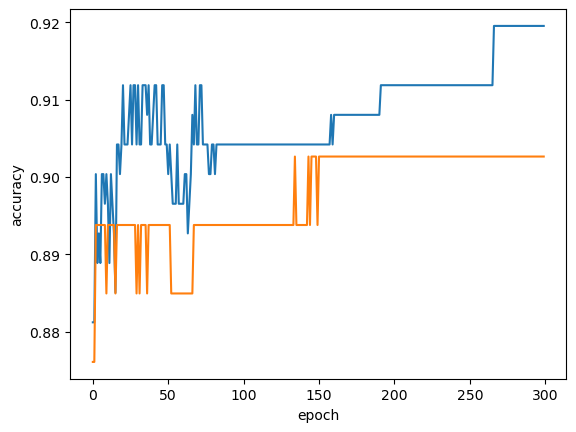

In [28]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()    

In [29]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=155, random_state=42)
sc.fit(X_train_scaled, y_train)

print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

0.9118773946360154
0.911504424778761


### 확률적 경사 하강법 결과

- 10번 반복 결과 <br>
    훈련데이터 점수: 0.9042145593869731 <br>
    테스트데이터 점수: 0.911504424778761 <br><br>   

- 추가 학습 결과 (partial_fit) <br>
    훈련데이터 점수: 0.9157088122605364 <br>
    테스트데이터 점수: 0.911504424778761 <br><br>   

- 155회 반복 실행 시 결과. <br>
    훈련데이터 점수: 0.9118773946360154 <br>
    테스트데이터 점수: 0.911504424778761 <br>  

<hr>

## 결정트리

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

print(dt.score(X_train_scaled, y_train))         
print(dt.score(X_test_scaled, y_test))

0.9348659003831418
0.8584070796460177


0.9348659003831418
0.8938053097345132


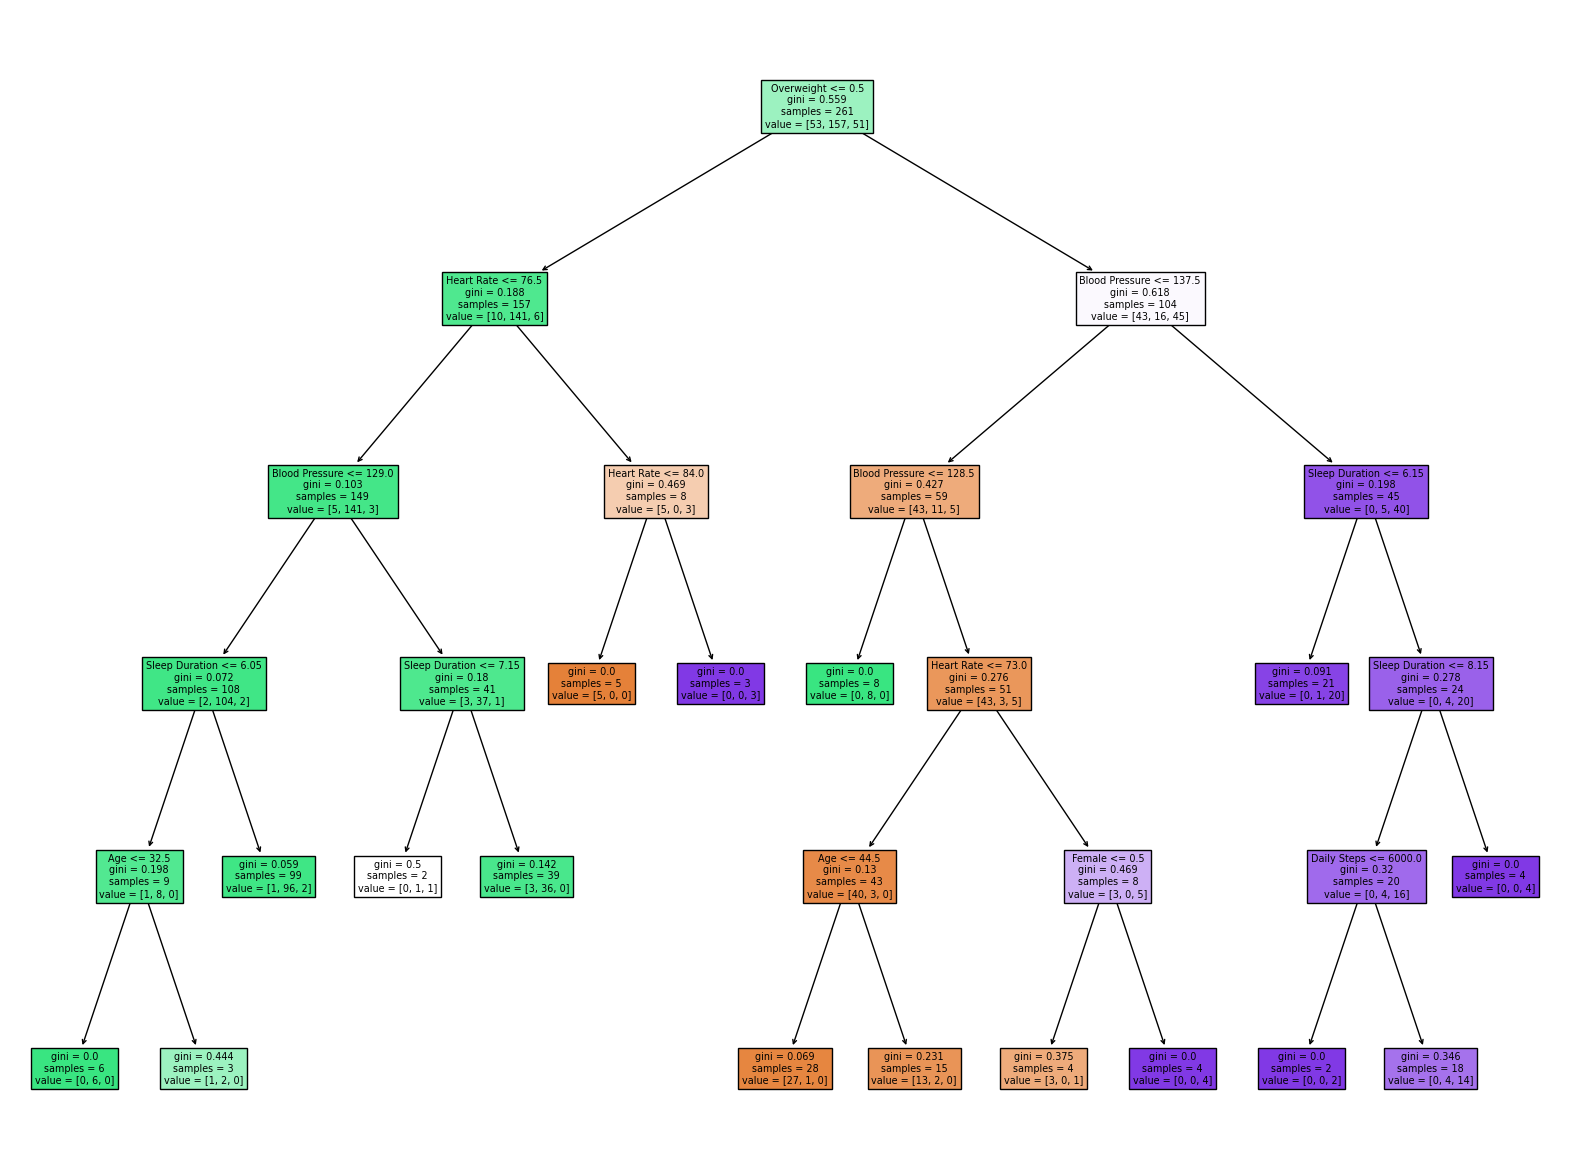

In [31]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0005, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level','Blood Pressure', 'Heart Rate', 'Daily Steps', 'Female', 'Male', 
           'Normal', 'Normal Weight', 'Obese', 'Overweight'])
plt.show()

###### 결정트리에서의 특성 중요도 확인

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
})

feature_importance

,feature,importance
0,Age,0.039237
1,Sleep Duration,0.027953
2,Quality of Sleep,0.003210
3,Physical Activity Level,0.002385
4,Stress Level,0.001759
5,Blood Pressure,0.348820
6,Heart Rate,0.114722
7,Daily Steps,0.001778
8,Female,0.018041
9,Male,0.000000


#### 교차 검증 진행

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import StratifiedKFold
import numpy as np

dt = DecisionTreeClassifier(random_state=42)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(dt, X_train, y_train, return_train_score=True, cv=splitter)
scores                     

{'fit_time': array([0.00698924, 0.00498176, 0.00600147, 0.00498796, 0.00398731,
        0.00302172, 0.00301242, 0.00300217, 0.00298476, 0.00353241]),
 'score_time': array([0.00303864, 0.00299859, 0.0039978 , 0.00302362, 0.00199819,
        0.00199199, 0.00199962, 0.00198293, 0.00201511, 0.00298595]),
 'test_score': array([0.92592593, 0.96153846, 0.76923077, 0.76923077, 0.96153846,
        0.92307692, 0.84615385, 0.84615385, 0.88461538, 0.96153846]),
 'train_score': array([0.93162393, 0.93191489, 0.94468085, 0.94468085, 0.93191489,
        0.93617021, 0.94468085, 0.94042553, 0.94042553, 0.93191489])}

In [34]:
print("n_splits=10으로 진행한 결과의 평균 값")
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))                       

n_splits=10으로 진행한 결과의 평균 값
0.9378432442262229
0.8849002849002849


#### 그리드 서치

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),             
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, random_state=42)       
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B4407856C0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001B43FB83A30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B440785960>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B440784CA0>},
                   random_state=42)

In [36]:
gs.best_params_

{'max_depth': 26,
 'min_impurity_decrease': 0.0005753702231821118,
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [37]:
dt = gs.best_estimator_

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9233716475095786
0.8938053097345132


### 결정트리, 교차 검증,  그리드 서치 결과

- 결정트리.
    - 결과 <br>
    훈련데이터 점수: 0.9348659003831418 <br>
    테스트데이터 점수: 0.8584070796460177 <br>
    - 하이퍼파라미터 튜닝 결과 <br>
    훈련데이터 점수: 0.9348659003831418 <br>
    테스트데이터 점수: 0.8938053097345132 <br>
- 교차 검증
    - 평균 결과 값 <br>
    훈련데이터 점수: 0.9378432442262229 <br>
    테스트데이터 점수: 0.8849002849002849 <br>
- 그리드 서치
    - 결과 <br>
    훈련데이터 점수: 0.9233716475095786 <br>
    테스트데이터 점수: 0.8938053097345132 <br>
<br>
- 그리드 서치의 결과가 가장 적절해 보임.

<hr>

## 앙상블

#### 랜덤 포레스트

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier 
import numpy as np

rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9377438351122562
0.9082728592162554


###### 랜덤 포레스트에서의 특성 중요도 확인

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'category': X.columns,
    'importance': rf.feature_importances_
})

feature_importance

,category,importance
0,Age,0.138569
1,Sleep Duration,0.111217
2,Quality of Sleep,0.033196
3,Physical Activity Level,0.075653
4,Stress Level,0.030776
5,Blood Pressure,0.199193
6,Heart Rate,0.057962
7,Daily Steps,0.068263
8,Female,0.010757
9,Male,0.015037


#### OOB 점수 확인

In [40]:
rf = RandomForestClassifier(oob_score=True, random_state=42)       
                                                                             
rf.fit(X_train, y_train)                                              
rf.oob_score_

0.9080459770114943

- 교차검증에서의 테스트 점수 : 0.8849002849002849
- 랜덤포레스트의 테스트 점수 : 0.9080459770114943

#### 엑스트라 트리

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9377438351122562
0.8890420899854863


###### 엑스트라 트리에서의 특성 중요도 확인

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=42)
et.fit(X, y)

feature_importance = pd.DataFrame({
    'category': X.columns,
    'importance': et.feature_importances_
})

feature_importance

,category,importance
0,Age,0.078479
1,Sleep Duration,0.072321
2,Quality of Sleep,0.059244
3,Physical Activity Level,0.088930
4,Stress Level,0.044228
5,Blood Pressure,0.130136
6,Heart Rate,0.052456
7,Daily Steps,0.061918
8,Female,0.022066
9,Male,0.026813


#### 그레이디언트 부스팅

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9377438351122562
0.9005805515239478


###### 그레이디언트 부스팅에서의 특성 중요도 확인

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X, y)

feature_importance = pd.DataFrame({
    'category': X.columns,
    'importance': gb.feature_importances_
})

feature_importance

,category,importance
0,Age,0.031496
1,Sleep Duration,0.017179
2,Quality of Sleep,0.005905
3,Physical Activity Level,0.109635
4,Stress Level,0.002264
5,Blood Pressure,0.443362
6,Heart Rate,0.054985
7,Daily Steps,0.057324
8,Female,0.001120
9,Male,0.002961


#### 히스토그램 기반 그레이디언트 부스팅

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True)

print("훈련, 테스트 데이터 평균점수")
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

훈련, 테스트 데이터 평균점수
0.9367868973132131
0.9082728592162554


##### 훈련 세트, 테스트 세트의 특성 중요도

In [46]:
from sklearn.inspection import permutation_importance

hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=10, random_state=42)
print(X.columns)
print(result.importances_mean)

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Female',
       'Male', 'Normal', 'Normal Weight', 'Obese', 'Overweight'],
      dtype='object')
[0.01532567 0.09846743 0.00038314 0.01455939 0.00191571 0.24137931
 0.03793103 0.02528736 0.         0.         0.02337165 0.
 0.         0.00076628]


In [47]:
result2 = permutation_importance(hgb, X_test, y_test, n_repeats=10,random_state=42)
print(result2.importances_mean)

[0.0159292  0.11238938 0.         0.02035398 0.01150442 0.29026549
 0.07699115 0.03185841 0.00884956 0.         0.06283186 0.
 0.         0.01504425]


In [48]:
print(hgb.score(X_train, y_train))
print(hgb.score(X_test, y_test))

0.9348659003831418
0.9026548672566371


### 랜덤 포레스트, 엑스트라 트리, 그레이디언트 부스팅, 히스토그램 기반 그레이디언트 부스팅

- 랜덤 포레스트
    - 결과 <br>
    훈련데이터 점수: 0.9377438351122562 <br>
    테스트데이터 점수: 0.9080459770114943 <br>
- 엑스트라 트리<br>
    - 결과 <br>
    훈련데이터 점수: 0.9377438351122562 <br>
    테스트데이터 점수: 0.8890420899854863 <br>
- 그레이디언트 부스팅 <br>
    - 결과 <br>
    훈련데이터 점수: 0.9377438351122562 <br>
    테스트데이터 점수: 0.9005805515239478 <br>
- 히스토그램 기반 그레이디언트 부스팅 <br>
    - 결과 <br>
    훈련데이터 점수: 0.9348659003831418 <br>
    테스트데이터 점수: 0.9026548672566371 <br>
<br>
- 랜덤 포레스트의 결과가 좋게 나옴을 알 수 있음.

<hr>